In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat, savemat
import pandas as pd
import scipy.special as SS
import scipy.stats as SSA
import copy
import random
import math
from sklearn.model_selection import ParameterGrid
import os
import numpy.linalg as LA
import gzip

# load pickle module
import pickle

In [5]:
pop = np.loadtxt('pop_new.csv')

In [43]:
R0 = 2.4
r = 0.03
save_dir = '../../../../../../Volumes/My Passport/branching/branching_results500/'
file_name1 = save_dir + "NewInf_R0-{}_r-{}.npy.gz" .format(np.round(R0,2),np.round(r,2))
f1 = gzip.GzipFile(file_name1, "r")
x =  np.load(f1)

In [44]:
E_daily_per_pop = x/pop[None,:,None]*100000 ### all the simulation (500, 3142, 60)

In [12]:
mean_daily_per_pop = np.mean(E_daily_per_pop,axis=0)
num_county_infected = np.where(mean_daily_per_pop[:,59] >10) ### len(num_county_infected[0])=60
### not everywhere is infected 

In [13]:
daily_per_pop_infected_county = np.zeros((60,500,60))
for c in range(60):
    c_idx = num_county_infected[0][c]
    daily_per_pop_infected_county[c,:,:] = E_daily_per_pop[:,c_idx,:]
std_ts = np.std(daily_per_pop_infected_county,axis=1)

Text(0, 0.5, 'std of the simulation ensemble')

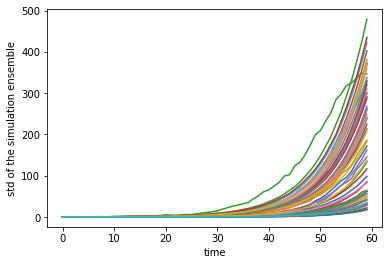

In [42]:
for i in range(60):
    plt.plot(std_ts[i])
plt.xlabel('time')
plt.ylabel('std of the simulation ensemble')

(array([7.39811995e-05, 0.00000000e+00, 3.69905998e-05, 1.10971799e-04,
        3.69905998e-05, 3.69905998e-05, 4.06896597e-04, 4.43887197e-04,
        5.54858996e-04, 7.02821395e-04, 8.13793195e-04, 5.91849596e-04,
        8.50783794e-04, 4.43887197e-04, 1.07272739e-03, 1.07272739e-03,
        8.13793195e-04, 6.28840196e-04, 8.13793195e-04, 9.24764994e-04,
        7.02821395e-04, 9.24764994e-04, 2.58934198e-04, 7.76802595e-04,
        4.80877797e-04, 4.43887197e-04, 6.65830796e-04, 5.17868397e-04,
        4.06896597e-04, 4.80877797e-04, 3.69905998e-04, 2.58934198e-04,
        2.95924798e-04, 2.95924798e-04, 1.84952999e-04, 1.10971799e-04,
        7.39811995e-05, 1.10971799e-04, 7.39811995e-05, 1.84952999e-04,
        7.39811995e-05, 3.69905998e-05, 3.69905998e-05, 1.10971799e-04,
        7.39811995e-05, 0.00000000e+00, 0.00000000e+00, 7.39811995e-05,
        0.00000000e+00, 3.69905998e-05]),
 array([ 221.57209074,  275.6398813 ,  329.70767185,  383.77546241,
         437.84325297,  49

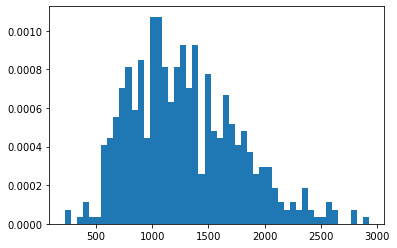

In [49]:
# plt.hist(x[:,308,59],density=True,bins=50)
plt.hist(E_daily_per_pop[:,1870,59],density=True,bins=50)
### when the std gets larger the likelihood gets very very small

## different counties have different ensemble std, they vary a lot 
## there are two options: a) time series of the new infections, b) time series of the number of counties with the per 100,000 > 10

### Try the number of counties whose num of infections per 100k pop is larger than 10

In [21]:
num_county = np.sum(E_daily_per_pop>10,axis=1)

mean_county = np.mean(num_county,axis=0)
# Numcounty_mean[i,j,:] = mean_county

std_county = np.std(num_county,axis=0)
# Numcounty_std[i,j,:] = std_county

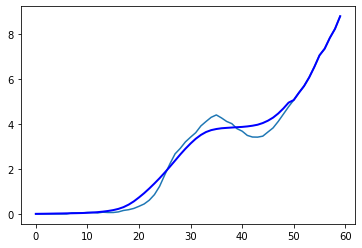

In [22]:
plt.plot(std_county)
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'same') / w

y = std_county
# plot(x, y,'o')
# plt.plot(smooth(y,14), 'r-', lw=2)
# plt.plot(moving_average(y, 11), 'g-', lw=2)
ma = np.zeros(60)
ma[-10:] = y[-10:]
ma[:50] = moving_average(y,15)[:50]

plt.plot(ma, 'b-', lw=2)

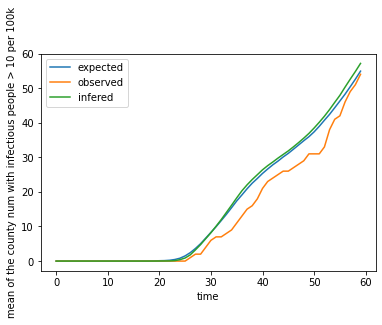

In [43]:
plt.plot(mean_county,label='expected')
plt.plot(observed_num_county,label='observed')
plt.plot(Numcounty_mean[28],label='infered')
plt.xlabel('time')
plt.ylabel('mean of the county num with infectious people > 10 per 100k')
plt.legend()

In [7]:
ma

array([2.97844105e-03, 5.95688211e-03, 8.93532316e-03, 1.31432522e-02,
       1.73511812e-02, 2.03296223e-02, 2.54780848e-02, 2.96860138e-02,
       3.38939429e-02, 3.98328915e-02, 5.00744192e-02, 6.25850369e-02,
       7.88467848e-02, 1.01356042e-01, 1.30791923e-01, 1.68491295e-01,
       2.22708969e-01, 3.01481478e-01, 4.12935585e-01, 5.57124481e-01,
       7.32093398e-01, 9.20977877e-01, 1.13005011e+00, 1.35319408e+00,
       1.58787932e+00, 1.83821029e+00, 2.09945282e+00, 2.36938305e+00,
       2.64006318e+00, 2.89495809e+00, 3.12816509e+00, 3.33835015e+00,
       3.50911944e+00, 3.63859138e+00, 3.72275082e+00, 3.77257629e+00,
       3.80598110e+00, 3.82301265e+00, 3.83829532e+00, 3.85249915e+00,
       3.86593476e+00, 3.88782693e+00, 3.91904702e+00, 3.96317175e+00,
       4.03763248e+00, 4.14240965e+00, 4.27953928e+00, 4.46251314e+00,
       4.68721291e+00, 4.94412075e+00, 5.05971185e+00, 5.38187291e+00,
       5.67992958e+00, 6.06766215e+00, 6.53241150e+00, 7.04750623e+00,
      

In [99]:
std_ma = ma

In [101]:
num_county_infected[0]

array([ 308,  309,  310,  311,  312,  313,  314,  315, 1774, 1775, 1776,
       1777, 1778, 1779, 1780, 1781, 1782, 1783, 1784, 1785, 1786, 1787,
       1788, 1789, 1790, 1791, 1792, 1793, 1794, 1830, 1836, 1838, 1840,
       1841, 1847, 1851, 1857, 1858, 1863, 1866, 1867, 1868, 1870, 1871,
       1875, 1879, 1880, 1883, 1887, 2252, 2258, 2266, 2282, 2283, 2288,
       2289, 2291, 2294, 2295, 2307])

In [45]:
# i = 308
observation_i = E_daily_per_pop[2,:,:]
observed_num_county = np.sum(observation_i>10,axis=0)

In [46]:
observed_num_county

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  2,  3,  4,  5,
        7,  6,  7,  7, 11, 11, 12, 12, 14])

In [16]:
def LE(obser, para, std_para):
    loguhflikelihood=0
    likelihood=SSA.norm.pdf(obser,loc=para,scale=std_para)
    likelihood[likelihood==0]=0.0000001
    loguhflikelihood+=np.sum(np.log(likelihood))#取对数并求和
    return loguhflikelihood

In [17]:
R0 = 2.4
rs = np.arange(0.01, 1, 0.02)

In [6]:
### check different rs 
R0 = 2.4
rs = np.arange(0.01, 1, 0.02)
save_dir = '../../../../../../Volumes/My Passport/branching/branching_results500/'

Numcounty_mean = np.zeros((50,60)) 
Numcounty_std = np.zeros((50,60))


for r_idx in range(50):
    r = rs[r_idx]
    file_name1 = save_dir + "NewInf_R0-{}_r-{}.npy.gz" .format(np.round(R0,2),np.round(r,2))
    f1 = gzip.GzipFile(file_name1, "r")
    x_i =  np.load(f1)
    E_daily_per_pop_i = x_i/pop[None,:,None]*100000 
    num_county_i = np.sum(E_daily_per_pop_i>10,axis=1)
    
    mean_county_i = np.mean(num_county_i,axis=0)
    Numcounty_mean[r_idx,:] = mean_county_i

    std_county_i = np.std(num_county_i,axis=0)
    Numcounty_std[r_idx,:] = std_county_i

In [7]:
np.savetxt('Numcounty_mean_real.txt',Numcounty_mean)
np.savetxt('Numcounty_std_real.txt',Numcounty_std)

In [18]:
Numcounty_mean = np.loadtxt('Numcounty_mean_real.txt')
Numcounty_std = np.loadtxt('Numcounty_std_real.txt')

In [23]:
R_loglikelihood = np.zeros(50)
R_std = np.zeros((50,60))
for r_idx in range(50):
#     print(r_idx)
    mean_county_r = Numcounty_mean[r_idx]
    std_r = Numcounty_std[r_idx]
    std_r_ma = np.zeros(60)
    std_r_ma[-10:] = std_r[-10:]
    std_r_ma[:50] = moving_average(std_r,15)[:50]
    std_r_ma[std_r_ma==0]=0.0000001
    R_std[r_idx] = std_r_ma
#     std_r_ma = mean_county_r*0.1+1
    R_loglikelihood[r_idx] = LE(observed_num_county,mean_county_r,std_r_ma)

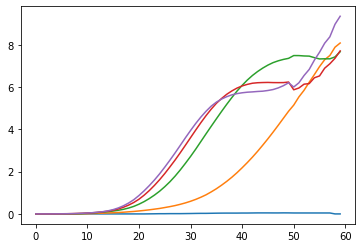

In [23]:
for r_idx in range(5):
    plt.plot(R_std[r_idx],label=rs[r_idx])
# plt.legend() ## for different r, the std of the observation can be quite a different

In [41]:
np.where(R_loglikelihood == np.max(R_loglikelihood))[0]

array([28])

(-100.0, 100.0)

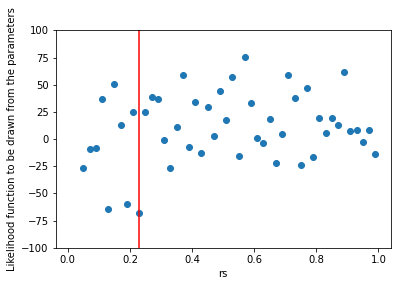

In [74]:
plt.scatter(rs,R_loglikelihood)
plt.axvline(0.23,color='red',label='real')
plt.xlabel('rs')
plt.ylabel('Likelihood function to be drawn from the parameters')
plt.ylim(-100,100)

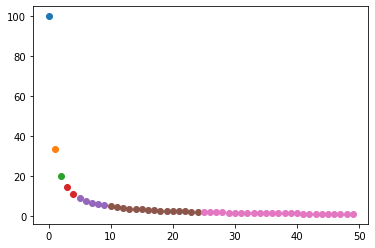

In [23]:
plt.scatter(range(50)[0], 1/rs[0])
plt.scatter(range(50)[1], 1/rs[1])
plt.scatter(range(50)[2], 1/rs[2])
plt.scatter(range(50)[3:5], 1/rs[3:5])
plt.scatter(range(50)[5:10], 1/rs[5:10])
plt.scatter(range(50)[10:25], 1/rs[10:25])
plt.scatter(range(50)[25:], 1/rs[25:])

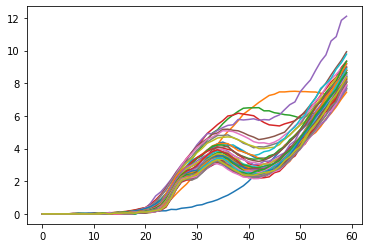

In [28]:
for r_idx in range(1,50):
    plt.plot(Numcounty_std[r_idx])
### it seems most of the std are similar

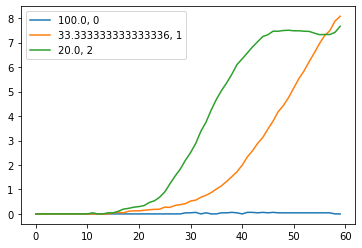

In [45]:
for r_idx in [0,1,2]:
    plt.plot(Numcounty_std[r_idx],label='{}, {}'.format(1/rs[r_idx],r_idx))
## these three are different
plt.legend()

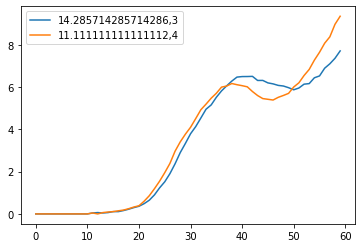

In [41]:
for r_idx in range(3,5):
#     print(r_idx)
    plt.plot(Numcounty_std[r_idx],label='{},{}'.format(1/rs[r_idx],r_idx)) ### similar use the mean 
plt.legend()

In [40]:
rs[5]

0.10999999999999997

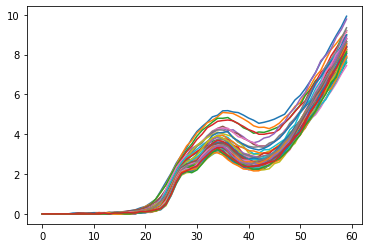

In [42]:
for r_idx in range(6,50):
    plt.plot(Numcounty_std[r_idx]) ### similar use the mean 

In [83]:
range_1 - std_1

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -4.26766158e-02,
       -2.95594677e-02, -5.08977756e-02, -7.01015826e-02, -9.68852607e-02,
       -1.10784297e-01, -1.40182150e-01, -1.80345056e-01, -2.24408530e-01,
       -2.60887699e-01, -3.30310919e-01, -3.97595244e-01, -4.84321296e-01,
       -5.11055181e-01, -4.54353466e-01, -3.27233742e-01, -1.21352237e-01,
        2.75143414e-01,  8.12170383e-01,  1.46536030e+00,  2.21592213e+00,
        3.02851737e+00,  3.95325046e+00,  5.04706834e+00,  6.20566772e+00,
        7.39593004e+00,  8.75742066e+00,  1.02000854e+01,  1.17437944e+01,
        1.31665274e+01,  1.46143012e+01,  1.61456733e+01,  1.76166904e+01,
        1.89371953e+01,  2.03115040e+01,  2.15211000e+01,  2.26303626e+01,
        2.37535529e+01,  2.49576184e+01,  2.60612806e+01,  2.71162155e+01,
        2.80748596e+01,  

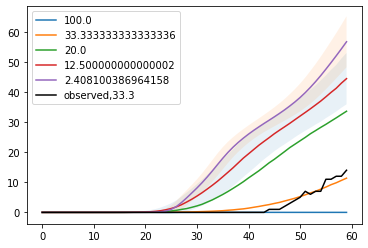

In [47]:
fig, ax = plt.subplots()
for r_idx in [0,1,2]:
    plt.plot(Numcounty_mean[r_idx],label=1/rs[r_idx])

range_1 = np.mean(Numcounty_mean[3:5],axis=0)
std_1 = np.mean(Numcounty_std[3:5],axis=0)
plt.plot(range(60), range_1, label=1/np.mean(rs[3:5]))
plt.fill_between(range(60),range_1-std_1,range_1+std_1,alpha=0.1)

range_2 = np.mean(Numcounty_mean[6:],axis=0)
std_2 = np.mean(Numcounty_std[6:],axis=0)
plt.plot(range(60), range_2, label=np.mean(1/rs[6:]))
plt.fill_between(range(60),range_2-std_2,range_2+std_2,alpha=0.1)

plt.plot(observed_num_county,label='observed,33.3',color='black')
# plt.plot(np.mean(Numcounty_mean[10:25],axis=0),label=1/np.mean(rs[10:25]))
# plt.plot(np.mean(Numcounty_mean[40:],axis=0),label=1/np.mean(rs[40:]))
plt.legend() ## for different r, the std of the observation can be quite a different

In [24]:
Inference_mean = np.zeros((5,60))
Inference_mean[:3,:] =  Numcounty_mean[:3,:]
Inference_mean[3,:] = np.mean(Numcounty_mean[3:5],axis=0)
Inference_mean[4,:] = np.mean(Numcounty_mean[6:],axis=0)

Inference_std = np.zeros((5,60))
Inference_std[:3,:] =  Numcounty_std[:3,:]
Inference_std[3,:] = np.mean(Numcounty_std[3:5],axis=0)
Inference_std[4,:] = np.mean(Numcounty_std[6:],axis=0)

In [56]:
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'same') / w

In [48]:
R_loglikelihood_range = np.zeros(5) ### different ranges
R_std = np.zeros((5,60))
for r_idx in range(5):
#     print(r_idx)
    mean_county_r = Inference_mean[r_idx]
    std_r = Inference_std[r_idx]
    std_r_ma = np.zeros(60)
    std_r_ma[-10:] = std_r[-10:]
    std_r_ma[:50] = moving_average(std_r,15)[:50]
    std_r_ma[std_r_ma==0]=0.0000001
    R_std[r_idx] = std_r_ma
#     std_r_ma = mean_county_r*0.1+1
    R_loglikelihood_range[r_idx] = LE(observed_num_county,mean_county_r,std_r_ma)

In [26]:
R_loglikelihood_range

array([-197.19233953, -728.83157164,  -26.84192287,   -7.6327618 ,
        -44.43291226])

In [38]:
1/0.11

9.090909090909092

[Text(0, 0, '0.01(100)'),
 Text(1, 0, '0.03(33.33)'),
 Text(2, 0, '0.05(20)'),
 Text(3, 0, '0.07-0.09(14-11)'),
 Text(4, 0, '0.11-0.99(9-1)')]

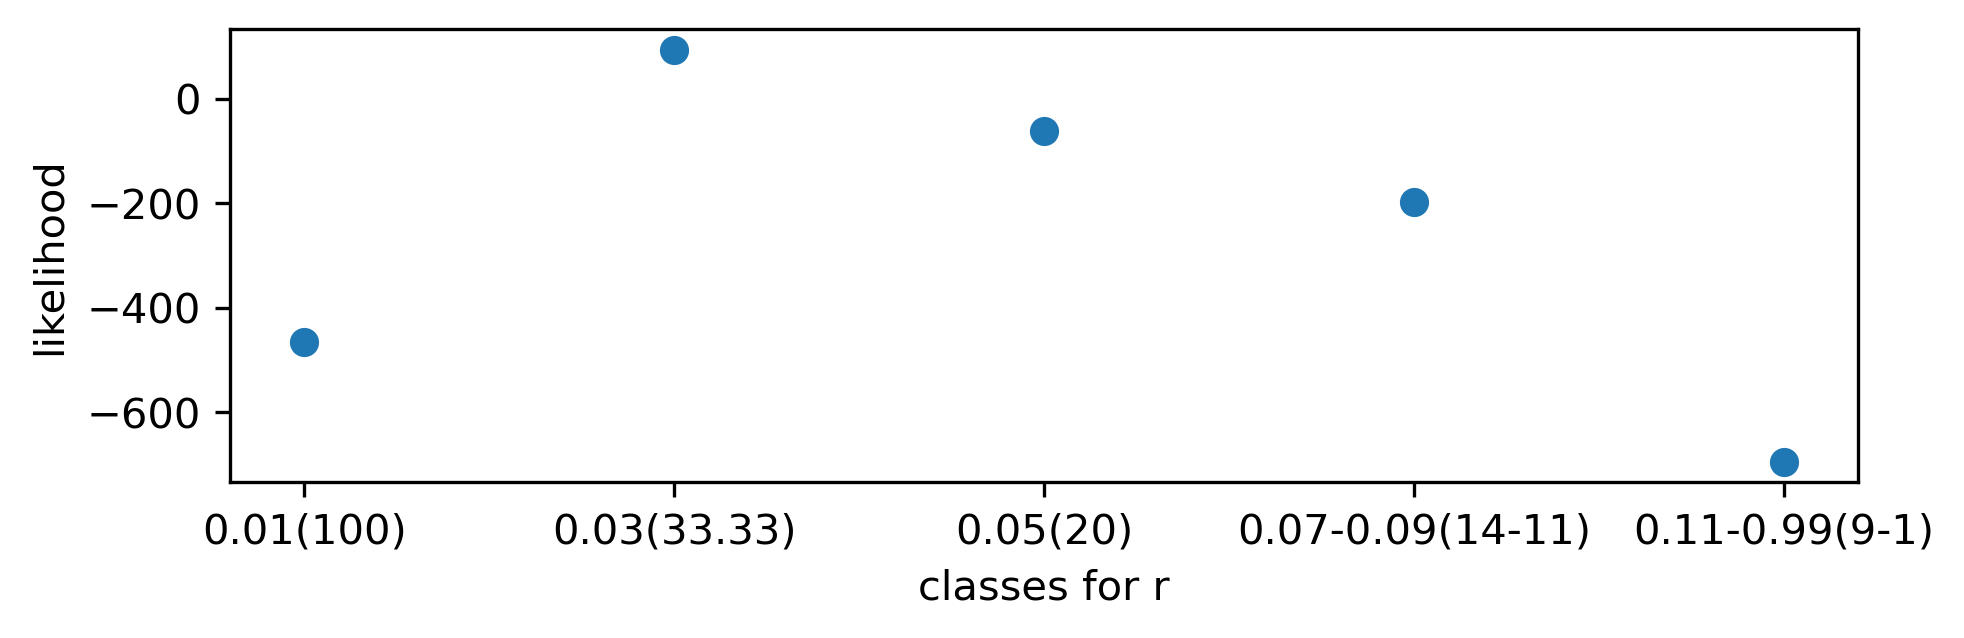

In [49]:
fig, ax = plt.subplots(figsize=(7,2),dpi=300)
ax.scatter(range(5),R_loglikelihood_range)
plt.xlabel('classes for r')
plt.ylabel('likelihood')
ax.set_xticks(range(5))
ax.set_xticklabels(['0.01(100)','0.03(33.33)','0.05(20)','0.07-0.09(14-11)','0.11-0.99(9-1)'])

In [66]:
### even the range can not be differentiated

In [68]:
1/0.23

4.3478260869565215

In [3]:
np.exp(-0.65)

0.522045776761016